# Data scraping as a basis for Analysis

----

In [104]:
# import of modules

In [105]:
import pandas as pd

In [106]:
import seaborn as sns # graphical use

In [107]:
import matplotlib.pyplot as plt # change size plots
plt.rcParams['figure.figsize'] = [40, 20]

In [108]:
plt.rc('legend',fontsize=20) # using a size in points to change size legend OR --> plt.rc('legend',fontsize='medium')

#### read csv data from disk -- > file "02.csv"

In [109]:
raw_data_cs=pd.read_csv("../resources/02.csv")

#### show the content raw_data_cs

In [110]:
raw_data_cs.head(4)

,Book_Available,Book_Category,Book_First_Link,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,True,Travel,https://books.toscrape.com/catalogue/category/...,45.17,2,It's Only the Himalayas,11
1,True,Travel,https://books.toscrape.com/catalogue/category/...,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
2,True,Travel,https://books.toscrape.com/catalogue/category/...,48.87,3,See America: A Celebration of Our National Par...,11
3,True,Travel,https://books.toscrape.com/catalogue/category/...,36.94,2,Vagabonding: An Uncommon Guide to the Art of L...,11


#### create copy befor changing the existing date

In [111]:
df=raw_data_cs.copy()

In [112]:
df.head(4)

,Book_Available,Book_Category,Book_First_Link,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,True,Travel,https://books.toscrape.com/catalogue/category/...,45.17,2,It's Only the Himalayas,11
1,True,Travel,https://books.toscrape.com/catalogue/category/...,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
2,True,Travel,https://books.toscrape.com/catalogue/category/...,48.87,3,See America: A Celebration of Our National Par...,11
3,True,Travel,https://books.toscrape.com/catalogue/category/...,36.94,2,Vagabonding: An Uncommon Guide to the Art of L...,11


#### show the contents of the whole file - display the maximum amount: columns and rows without limits

In [113]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

#### show the whole file once more

In [114]:
#display(df).head(4)  --> very big and not so eradable like in Jupyter 

#### show information about the database structure - including: data type, file size, existing columns

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book_Available              1000 non-null   bool   
 1   Book_Category               1000 non-null   object 
 2   Book_First_Link             1000 non-null   object 
 3   Book_Price                  1000 non-null   float64
 4   Book_Stars                  1000 non-null   int64  
 5   Book_Title                  1000 non-null   object 
 6   Book_total_category_amouth  1000 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 48.0+ KB


----

##### data cleaning - we remove the columns "Book_Available", "Book_First_Link" that are unnecessary for analysis --> axis = 1 - removing columns

In [116]:
df=df.drop(['Book_Available'], axis=1)

In [117]:
df=df.drop(['Book_First_Link'], axis=1)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book_Category               1000 non-null   object 
 1   Book_Price                  1000 non-null   float64
 2   Book_Stars                  1000 non-null   int64  
 3   Book_Title                  1000 non-null   object 
 4   Book_total_category_amouth  1000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [119]:
#raw_data_cs # check one more time - if raw data without any changes

In [120]:
#df # new working file for use

----

### subject 1:  min and max value for the df and kol 'Book_Price'

SELECT MIN(Book_Price) 
FROM df;

SELECT MAX(Book_Price) 
FROM df;

In [121]:
df['Book_Price'].min()

10.0

In [122]:
df['Book_Price'].max()

59.99

### subject 2:  min and max value for the df and kol 'Book_Price'

In [123]:
#SELECT 
#MIN(Book_Price) as min_price
#FROM df
#ORDER BY min_price
#LIMIT 5;

In [124]:
min_price=sorted(df['Book_Price'].unique())
min_price[:5]

[10.0, 10.01, 10.02, 10.16, 10.23]

#### subject 3:  min and max value for the df and kol 'Book_Stars'

SELECT MIN(Book_Stars) FROM df;

SELECT MAX(Book_Stars) FROM df;

In [125]:
df['Book_Stars'].max()

5

In [126]:
df['Book_Stars'].min()

1

#### subject 4:  dictinct value for Book_Stars

SELECT DISTINCT Book_Stars
FROM df;

In [127]:
pd.unique(df['Book_Stars'])

array([2, 4, 3, 1, 5])

Method nr 2

In [128]:
df['Book_Stars'].unique()

array([2, 4, 3, 1, 5])

In [129]:
len(df['Book_Stars'].unique())

5

SELECT DISTINCT Book_total_category_amouth FROM df;

In [130]:
pd.unique(df['Book_total_category_amouth'])

array([ 11,  32,  26,  75,  19,  35,  17,  65,  29,   7, 110,  13, 152,
        16,   5,  67,  48,   6,  54,  14,   1,   8,   9,  10,  18,  30,
        12,   3,   2,   4])

In [131]:
len(df['Book_total_category_amouth'].unique())

30

In [132]:
amoyth_books_in_every_category=sorted(df['Book_total_category_amouth'].unique())
# show me last 15 
reverse_tab=amoyth_books_in_every_category[::-1] # show me last 15 - sorted from Max to min  
reverse_tab[:15]

[152, 110, 75, 67, 65, 54, 48, 35, 32, 30, 29, 26, 19, 18, 17]

----

In [133]:
df.head(2) # show me tabel again

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,Travel,45.17,2,It's Only the Himalayas,11
1,Travel,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11


#### subject 5:  show the best five Title Books -- > I’m interested in the Book_Title of the books - with stars 5. Show only first 5 title

SELECT Book_Title
FROM df
WHERE Book_Stars=5
LIMIT 5;

In [134]:
df_title_stars5 = df.loc[df["Book_Stars"] == 5, "Book_Title" ] 
df_title_stars5.head(5)

10                   1,000 Places to See Before You Die
19               A Time of Torment (Charlie Parker #14)
28    What Happened on Beale Street (Secrets of the ...
29    The Bachelor Girl's Guide to Murder (Herringfo...
33                    The Silkworm (Cormoran Strike #2)
Name: Book_Title, dtype: object

#### subject 6:  show the best five or four stars Title Books

SELECT Book_Title
FROM df
WHERE Book_Stars=5 or Book_Stars=4 
LIMIT 3;

In [135]:
df_title_stars4_5_category_Art = df.loc[df["Book_Stars"].isin([4,5])]
df_title_stars4_5_category_Art.head()

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
1,Travel,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
7,Travel,56.88,4,A Year in Provence (Provence #1),11
10,Travel,26.08,5,"1,000 Places to See Before You Die",11
11,Mystery,47.82,4,Sharp Objects,32
13,Mystery,56.50,4,The Past Never Ends,32


#### subject 7:  show the best five  stars Title Books in Category Travel

In [136]:
# SELECT Book_Category, Book_Price, Book_Stars, Book_Title, Book_total_category_amouth
# FROM df
# WHERE Book_Stars=5 and Book_Category="Travel" 

In [137]:
star_5_cat_Travel = df[(df["Book_Stars"] == 5) & (df["Book_Category"] == "Travel")]
star_5_cat_Travel

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
10,Travel,26.08,5,"1,000 Places to See Before You Die",11


#### subject 8:  show the best five  stars Title Books in Category Travel or belong to category Crime (stars is not important)

In [138]:

# SELECT Book_Category, Book_Price, Book_Stars, Book_Title, Book_total_category_amouth
# FROM df
# WHERE Book_Stars=5 and Book_Category="Travel" or and Book_Category="Crime"


In [139]:
star_5_cat_Travel_or_cat_Crime = df[(df["Book_Stars"] == 5) & (df["Book_Category"] == "Travel")| (df["Book_Category"] == "Crime")]
star_5_cat_Travel_or_cat_Crime

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
10,Travel,26.08,5,"1,000 Places to See Before You Die",11
999,Crime,10.97,1,The Long Shadow of Small Ghosts: Murder and Me...,1


#### subject 9:  show the worst (1*) books and their price <11.00

In [140]:
# SELECT * FROM df WHERE Book_Stars=1 and Book_Price < 11 order by Book_Price;

In [141]:
a=df[(df["Book_Stars"] ==1) & (df["Book_Price"] < 11.00)]
a.sort_values("Book_Price")

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
840,Psychology,10.40,1,The Lucifer Effect: Understanding How Good Peo...,7
315,Childrens,10.62,1,Counting Thyme,29
605,Science Fiction,10.65,1,The Project,16
18,Mystery,10.69,1,Tastes Like Fear (DI Marnie Rome #3),32
474,Default,10.76,1,Miss Peregrine’s Home for Peculiar Children (M...,152
610,Science Fiction,10.92,1,The Restaurant at the End of the Universe (Hit...,16
999,Crime,10.97,1,The Long Shadow of Small Ghosts: Murder and Me...,1


In [142]:
#SELECT Book_Stars, count(*)
#FROM df
#GROUP BY Book_Stars;

In [143]:
df.groupby("Book_Stars").size()

Book_Stars
1    226
2    196
3    203
4    179
5    196
dtype: int64

In [144]:
226+196+203+179+196

1000

----

In [146]:
df.head(12) # show me tabel again

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
0,Travel,45.17,2,It's Only the Himalayas,11
1,Travel,49.43,4,Full Moon over Noah’s Ark: An Odyssey to Mount...,11
2,Travel,48.87,3,See America: A Celebration of Our National Par...,11
3,Travel,36.94,2,Vagabonding: An Uncommon Guide to the Art of L...,11
4,Travel,37.33,3,Under the Tuscan Sun,11
5,Travel,44.34,2,A Summer In Europe,11
6,Travel,30.54,1,The Great Railway Bazaar,11
7,Travel,56.88,4,A Year in Provence (Provence #1),11
8,Travel,23.21,1,The Road to Little Dribbling: Adventures of an...,11
9,Travel,38.95,3,Neither Here nor There: Travels in Europe,11


#### topic 10: I have to choose a book for the client, he likes travel and erotic, he wants to buy the 5 most expensive and best rated books from these categories. if there are not so many who meet this condition - look for Art

#SELECT Book_Title
#FROM df
#WHERE Book_Category in ("Travel","Erotica") and Book_Stars=5 
#Order by Book_Price
#LIMIT 5;

In [147]:
df_title_stars5_Travel_or_Erotic_5expensive = df.loc[(df["Book_Stars"] == 5)&(df["Book_Category"].isin(["Travel","Erotica"])) ] # | (df["Book_Category"] == "Art")] 
df_title_stars5_Travel_or_Erotic_5expensive.head(5)

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
10,Travel,26.08,5,"1,000 Places to See Before You Die",11
998,Erotica,19.19,5,Dark Notes,1


CONCLUSION: the condition is not fulfilled, there are only 2 most desirable books, so I add a supplementary condition -
if there are not so many who meet this condition - look for Art - 5 * and highest Price

In [148]:
df_title_stars5_Travel_or_Erotic_5expensive = df.loc[(df["Book_Stars"] == 5)&(df["Book_Category"].isin(["Travel","Erotica"]))   | ((df["Book_Category"] == "Art") &(df["Book_Stars"] == 5))] 
df_title_stars5_Travel_or_Erotic_5expensive.sort_values("Book_Price")


,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
998,Erotica,19.19,5,Dark Notes,1
10,Travel,26.08,5,"1,000 Places to See Before You Die",11
839,Art,39.51,5,Ways of Seeing,8


the condition is not fulfilled,we have only 3 books for this Client

----

#### topic 11: client wants book, but he isnt sure about title. he only know that begin  "Dark..." ,  - help him

#SELECT *
#FROM df
#WHERE Book_Title LIKE "Dark%"

In [156]:
df_title_FaceGray = df[df['Book_Title'].str.startswith('Dark')]
df_title_FaceGray

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
192,Romance,12.87,1,Dark Lover (Black Dagger Brotherhood #1),35
590,Default,23.90,5,Dark Places,152
727,Fantasy,56.02,1,Darkfever (Fever #1),48
998,Erotica,19.19,5,Dark Notes,1


conclusion: you have books in stock titled: "Dark Lover (Black Dagger Brotherhood #1)", "Dark Places", "Darkfever (Fever #1","Dark Notes" 

----

In [157]:
# available columns

https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

In [158]:
cols_name = list(df.columns.values)

In [159]:
cols_name

['Book_Category',
 'Book_Price',
 'Book_Stars',
 'Book_Title',
 'Book_total_category_amouth']

In [160]:
cols_name[0]

'Book_Category'

In [161]:
# change place columns 

In [162]:
df = df[[cols_name[3],cols_name[2],cols_name[1],cols_name[0],cols_name[4]]]

In [163]:
df.head(5)

,Book_Title,Book_Stars,Book_Price,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.17,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,4,49.43,Travel,11
2,See America: A Celebration of Our National Par...,3,48.87,Travel,11
3,Vagabonding: An Uncommon Guide to the Art of L...,2,36.94,Travel,11
4,Under the Tuscan Sun,3,37.33,Travel,11


----

In [164]:
# find the average price of 1 book in each topic category
# enter how many books in each category

SELECT Book_Category, avg(Book_Price),count(*)
FROM df
GROUP BY Book_Category;

In [165]:
import numpy as np

In [166]:
df.groupby("Book_Category").agg({"Book_Price": np.mean, "Book_Category": np.size})[:5] #first 5 

,Book_Price,Book_Category
Book_Category,,
Academic,13.120000,1
Add a comment,35.796418,67
Adult Fiction,15.360000,1
Art,38.520000,8
Autobiography,37.053333,9


In [167]:
# change columns names

In [168]:
df_grupyby_Book_Category_mean_price_and_count_amouth=df.groupby("Book_Category").agg({"Book_Price": np.mean, "Book_Category": np.size})

df2_Category_MeanPrice_Amouth = df_grupyby_Book_Category_mean_price_and_count_amouth.rename(columns = 
                                                                                            {'Book_Price': 'Mean_Books_Price', 
                                                                                             'Book_Category': 'Book_amouth'},
                                                                                            inplace = False)

In [170]:
df2_Category_MeanPrice_Amouth.head(5)

,Mean_Books_Price,Book_amouth
Book_Category,,
Academic,13.120000,1
Add a comment,35.796418,67
Adult Fiction,15.360000,1
Art,38.520000,8
Autobiography,37.053333,9


In [171]:
# create plot
# OX - Book Category
# OY - the number of books on this subject

<AxesSubplot:xlabel='Book_Category'>

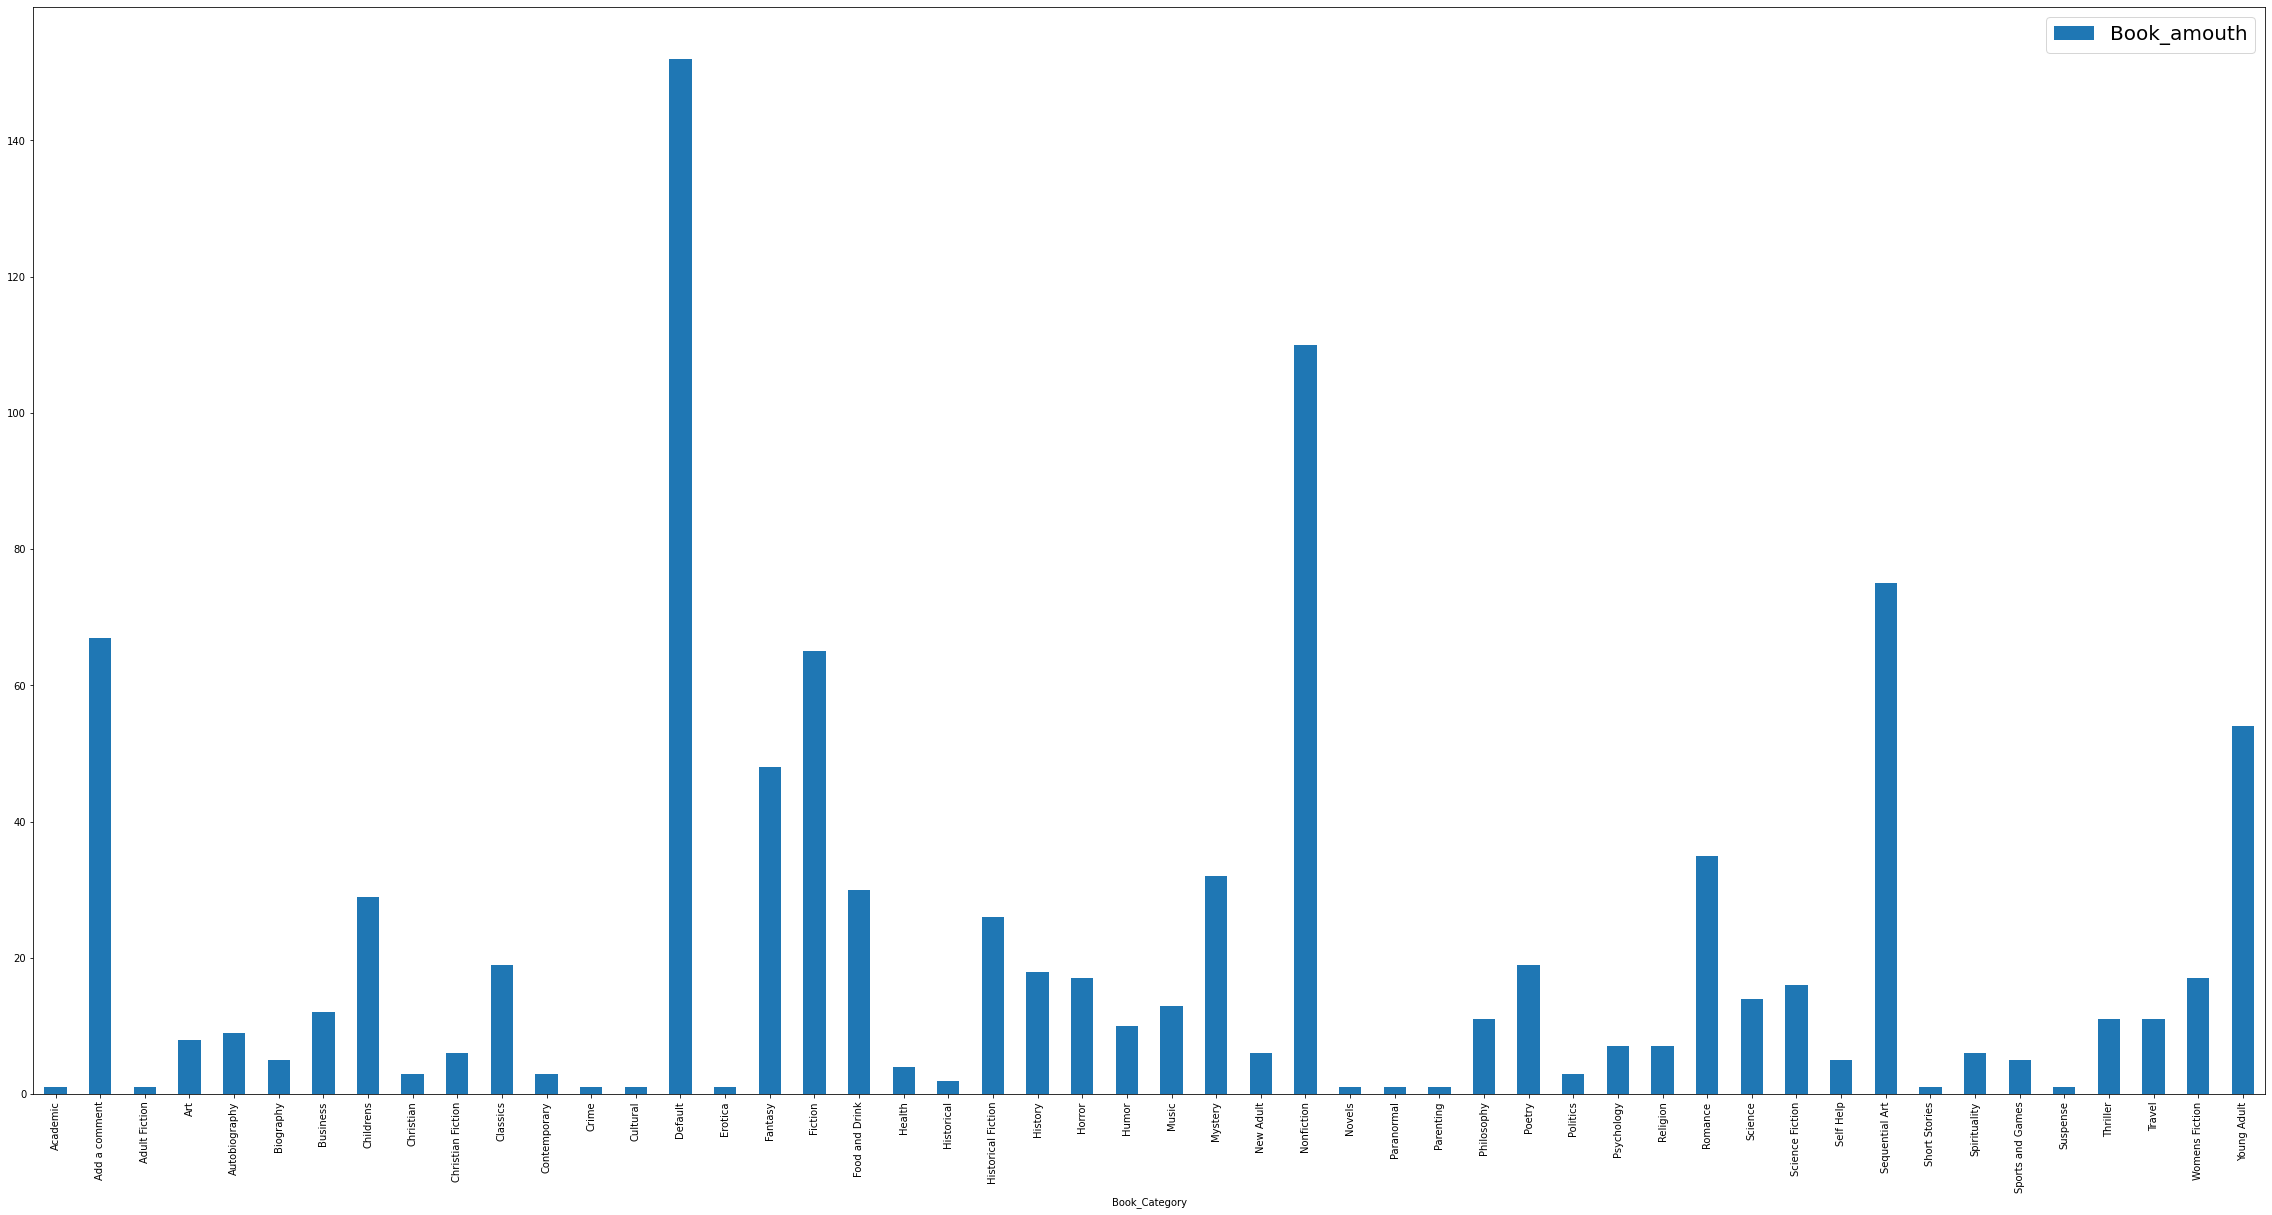

In [172]:
df2_Category_MeanPrice_Amouth.plot.bar(y='Book_amouth')

In [173]:
# create plot
# OX - Mean_Books_Price
# OY - the number of books on this subject

<AxesSubplot:xlabel='Book_Category'>

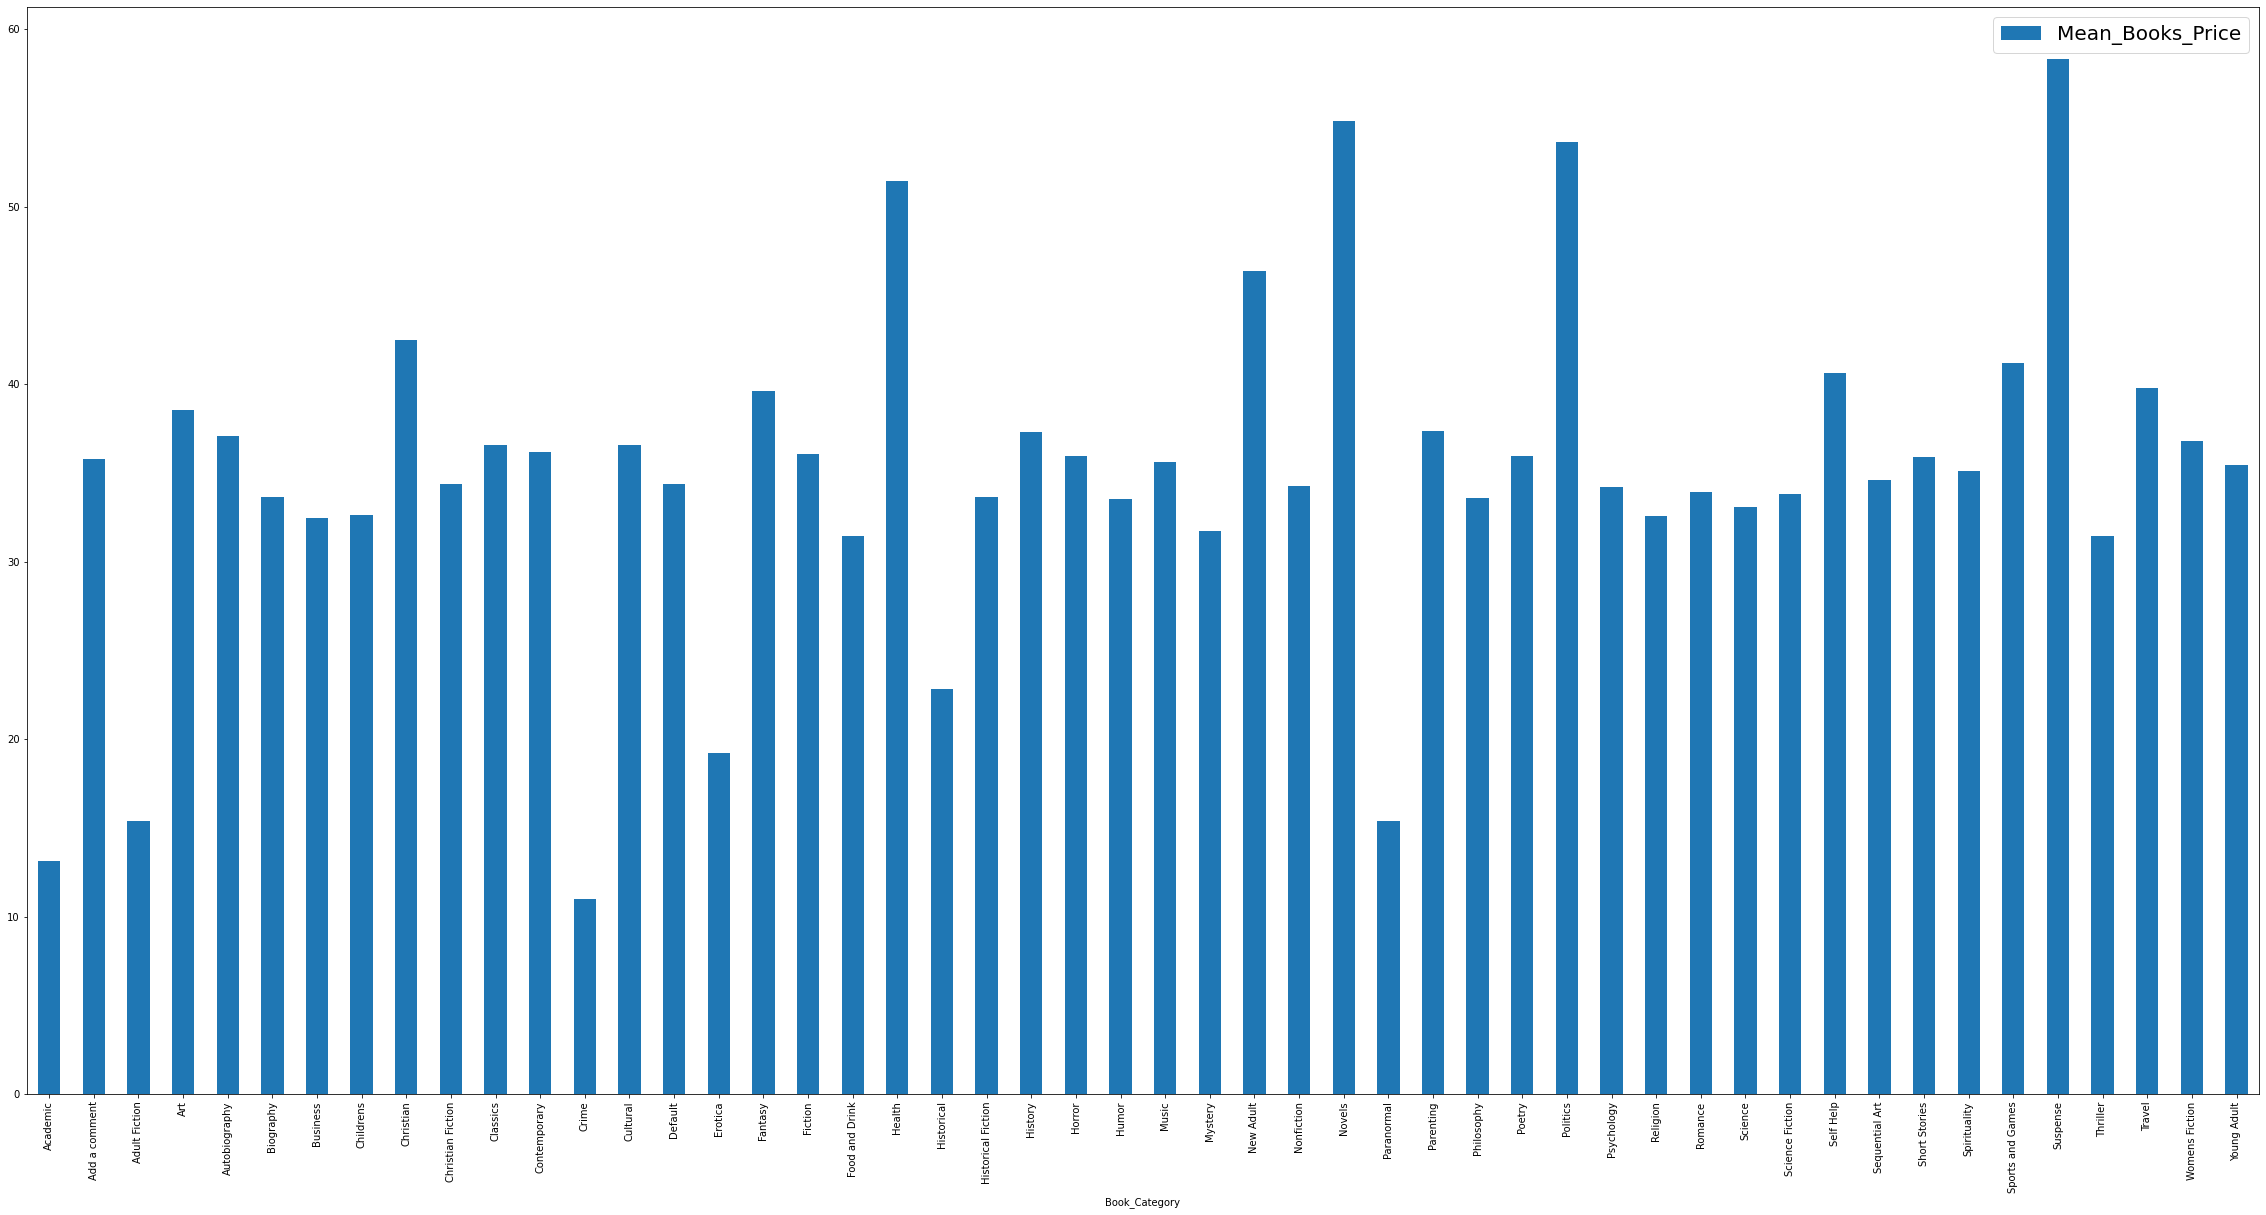

In [174]:
df2_Category_MeanPrice_Amouth.plot.bar(y='Mean_Books_Price')

In [175]:
# only books with more than 50 items in stock

In [176]:
book_amouth_more_than_50 = df2_Category_MeanPrice_Amouth.loc[df2_Category_MeanPrice_Amouth["Book_amouth"]>50]
book_amouth_more_than_50

,Mean_Books_Price,Book_amouth
Book_Category,,
Add a comment,35.796418,67
Default,34.392697,152
Fiction,36.066615,65
Nonfiction,34.260182,110
Sequential Art,34.572267,75
Young Adult,35.449074,54


In [177]:
# only 2 kol - >  kol Book_amouth and Book_Category

In [178]:
book_amouth_more_than_50.iloc[0:6, 1:2]

,Book_amouth
Book_Category,
Add a comment,67
Default,152
Fiction,65
Nonfiction,110
Sequential Art,75
Young Adult,54


In [179]:
# showing on a circle chart the percentage distribution of individual categories - selected earlier

In [180]:
list_book_cat_and_amouth=book_amouth_more_than_50.iloc[0:6, 1:2]

array([<AxesSubplot:ylabel='Book_amouth'>], dtype=object)

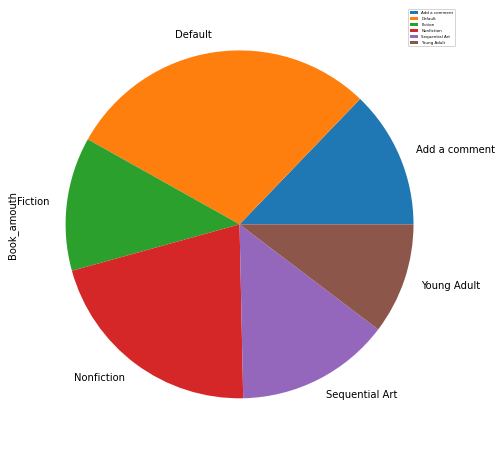

In [181]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rc('legend',fontsize=4)
list_book_cat_and_amouth.plot.pie(subplots=True)

----

In [182]:
# wygeneruj pytanie - inetersuje mnie min , max i sr cena ksiazek , z uwzglednieniem kategori 

In [183]:
# sztucznie doloz dwie kolmny (kopie kolumny price) i je inaczej nazwij 

In [184]:
df_2_copy=df.copy()

In [185]:
df_2_extra_copy_kol_price=df_2_copy[[cols_name[3],cols_name[2],cols_name[1],cols_name[1],cols_name[1],cols_name[0],cols_name[4]]]

In [186]:
df_2_extra_copy_kol_price.head(2)

,Book_Title,Book_Stars,Book_Price,Book_Price,Book_Price,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.17,45.17,45.17,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,4,49.43,49.43,49.43,Travel,11


In [187]:
#rename 2 kolumn

In [188]:
#df_2_copy[[cols_name[3],cols_name[2],cols_name[1],cols_name[1],cols_name[1],cols_name[0],cols_name[4]]]=df_2_copy['Book_Title','Book_Stars','Book_Price','Book_Price_copy1','Book_Price_copy2','']

In [189]:
df_2_extra_copy_kol_price.columns

Index(['Book_Title', 'Book_Stars', 'Book_Price', 'Book_Price', 'Book_Price',
       'Book_Category', 'Book_total_category_amouth'],
      dtype='object')

In [190]:
df_2_extra_copy_kol_price.columns = ['Book_Title','Book_Stars', 'Book_Price', 'Book_Price_copy1', 'Book_Price_copy2','Book_Category','Book_total_category_amouth']

In [191]:
df_2_extra_copy_kol_price.head(2)

,Book_Title,Book_Stars,Book_Price,Book_Price_copy1,Book_Price_copy2,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.17,45.17,45.17,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount...,4,49.43,49.43,49.43,Travel,11


In [192]:
# teraz gdy mam indywidualne nazwy moge rownoczenie wygenerowac min i max

In [193]:
# znajdz sr cene 1 ks w kazdej kat tematycznej i podaj il ksiazek w kazdej kat

#SELECT Book_Category, avg(Book_Price),count(*),min(Book_Price),max(Book_Price)
#FROM df
#GROUP BY Book_Category;

In [195]:
df_2_extra_copy_kol_price.groupby("Book_Category").agg(
    {"Book_Price": np.mean, 
     "Book_Category": np.size,
     "Book_Price_copy1": np.min,
     "Book_Price_copy2": np.max,
    })[:10] #first ten

,Book_Price,Book_Category,Book_Price_copy1,Book_Price_copy2
Book_Category,,,,
Academic,13.120000,1,13.12,13.12
Add a comment,35.796418,67,10.02,59.15
Adult Fiction,15.360000,1,15.36,15.36
Art,38.520000,8,10.29,49.05
Autobiography,37.053333,9,10.93,59.04
Biography,33.662000,5,16.85,48.19
Business,32.460000,12,12.61,51.74
Childrens,32.638276,29,10.62,58.08
Christian,42.496667,3,25.77,54.00


In [196]:
tab_MeanPrice_Category_MinPrice_MaxPrice=df_2_extra_copy_kol_price.groupby("Book_Category").agg(
    {"Book_Price": np.mean, 
     "Book_Category": np.size,
     "Book_Price_copy1": np.min,
     "Book_Price_copy2": np.max,
    })

In [197]:
tab_Min_Max_Mean_Price_Amouth = tab_MeanPrice_Category_MinPrice_MaxPrice.rename(columns =
                                                {'Book_Price': 'Mean_Books_Price',
                                                 'Book_Category': 'Book_amouth',
                                                 'Book_Price_copy1': 'Min_Price',
                                                 'Book_Price_copy2': 'Max_Price'}, inplace = False)

In [198]:
tab_Min_Max_Mean_Price_Amouth.head(2)

,Mean_Books_Price,Book_amouth,Min_Price,Max_Price
Book_Category,,,,
Academic,13.120000,1,13.12,13.12
Add a comment,35.796418,67,10.02,59.15


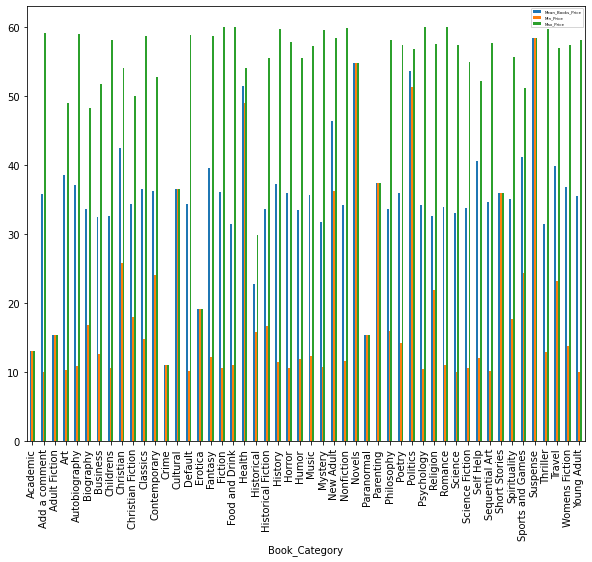

In [200]:
tab_Min_Max_Mean_Price_Amouth.plot.bar(y=['Mean_Books_Price','Min_Price','Max_Price' ])
figsize=(40, 40)

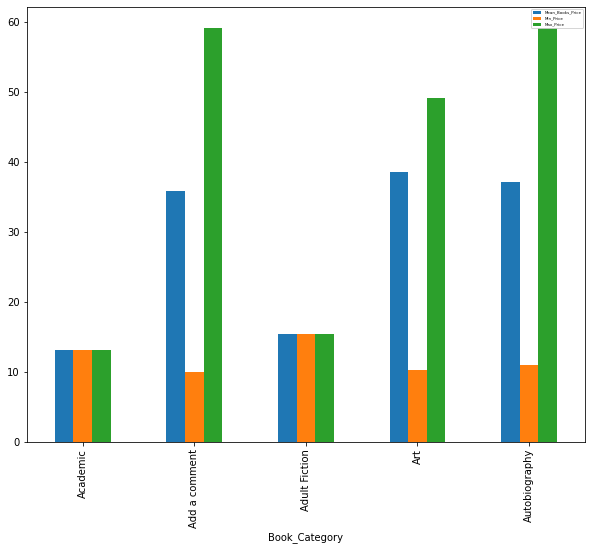

In [202]:
tab_Min_Max_Mean_Price_Amouth[:5].plot.bar(y=['Mean_Books_Price','Min_Price','Max_Price' ]) #first 5
figsize=(40, 40)

array([[<AxesSubplot:ylabel='Mean_Books_Price'>],
       [<AxesSubplot:ylabel='Book_amouth'>],
       [<AxesSubplot:ylabel='Min_Price'>],
       [<AxesSubplot:ylabel='Max_Price'>]], dtype=object)

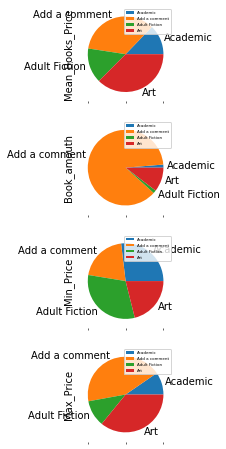

In [203]:
tab_Min_Max_Mean_Price_Amouth[:4].plot.pie(subplots=True,layout=(4,1)) # analiza dla wszytskich kategori na litere A
# Akademic, Add a comment, Adult Fiction, Art -> first 4 in tab 

In [204]:
# read value min max for Category - Add a comment - rows =1 :

In [205]:
single_category_Add_a_comment_tab_Min_Max_Mean_Price_Amouth= tab_Min_Max_Mean_Price_Amouth.iloc[1]
single_category_Add_a_comment_tab_Min_Max_Mean_Price_Amouth

Mean_Books_Price    35.796418
Book_amouth         67.000000
Min_Price           10.020000
Max_Price           59.150000
Name: Add a comment, dtype: float64

<AxesSubplot:>

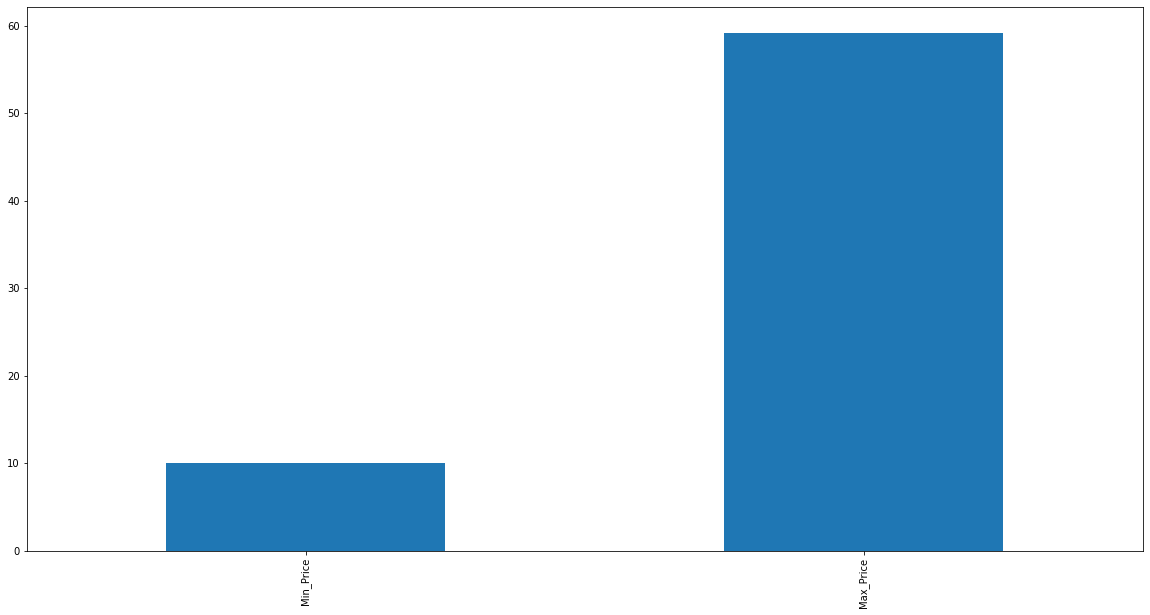

In [206]:
plt.rc('legend',fontsize=8)
plt.rcParams['figure.figsize'] = [20, 10]
single_category_Add_a_comment_tab_Min_Max_Mean_Price_Amouth[2:4].plot.bar(y=
                                                                     ['Min_Price',
                                                                      'Max_Price']) 
# chce tylko zobaczyc max i min stad single_category_Add_a_comment_tab_Min_Max_Mean_Price_Amouth[2:4]

i need change the size my plot - source --> https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger

In [207]:
a.head(5)

,Book_Category,Book_Price,Book_Stars,Book_Title,Book_total_category_amouth
18,Mystery,10.69,1,Tastes Like Fear (DI Marnie Rome #3),32
315,Childrens,10.62,1,Counting Thyme,29
474,Default,10.76,1,Miss Peregrine’s Home for Peculiar Children (M...,152
605,Science Fiction,10.65,1,The Project,16
610,Science Fiction,10.92,1,The Restaurant at the End of the Universe (Hit...,16


----

change color to visualisation min and max Book_Stars

In [208]:
def color_1star_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val == 1 or val==2 else 'black'
    return 'color: %s' % color

In [212]:
color_value_1_star_styling = df[:5].style.applymap(color_1star_red)# first 5
color_value_1_star_styling

,Book_Title,Book_Stars,Book_Price,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.170000,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount Ararat and Beyond,4,49.430000,Travel,11
2,See America: A Celebration of Our National Parks & Treasured Sites,3,48.870000,Travel,11
3,Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel,2,36.940000,Travel,11
4,Under the Tuscan Sun,3,37.330000,Travel,11


In [213]:
def color_1star_red_5star_blue(val):
    if val == 1:
        color = 'red' 
    elif val == 5:
        color = 'blue' 
    else:
        color = 'yellow'
    return 'color: %s' % color

In [216]:
color_value_1_star_styling = df[:15].style.applymap(color_1star_red_5star_blue) #first 15
color_value_1_star_styling

,Book_Title,Book_Stars,Book_Price,Book_Category,Book_total_category_amouth
0,It's Only the Himalayas,2,45.170000,Travel,11
1,Full Moon over Noah’s Ark: An Odyssey to Mount Ararat and Beyond,4,49.430000,Travel,11
2,See America: A Celebration of Our National Parks & Treasured Sites,3,48.870000,Travel,11
3,Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel,2,36.940000,Travel,11
4,Under the Tuscan Sun,3,37.330000,Travel,11
5,A Summer In Europe,2,44.340000,Travel,11
6,The Great Railway Bazaar,1,30.540000,Travel,11
7,A Year in Provence (Provence #1),4,56.880000,Travel,11
8,The Road to Little Dribbling: Adventures of an American in Britain (Notes From a Small Island #2),1,23.210000,Travel,11
9,Neither Here nor There: Travels in Europe,3,38.950000,Travel,11


In [217]:
# filter two columns and then sort data by Stars kolumn and then by Book_Price

In [218]:
Book_Stars_and_Book_Price=df.filter(items=['Book_Stars', 'Book_Price'])

In [219]:
sorted_by_stars=Book_Stars_and_Book_Price.sort_values(by=['Book_Stars','Book_Price']) 

In [221]:
sorted_by_stars.head(5) # first 5

,Book_Stars,Book_Price
840,1,10.40
315,1,10.62
605,1,10.65
18,1,10.69
474,1,10.76
